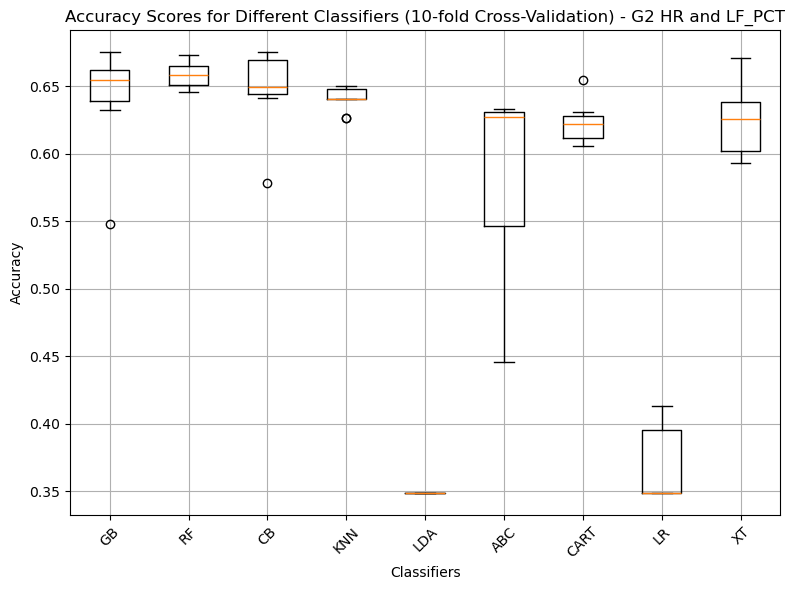

In [4]:
# loaded model for RF Dataverse
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# # Read in data as pandas dataframe and display first 5 rows
dataset = pd.read_csv('/Users/samson/Documents/Final3/swell2/merged_hrv_stress_labels.csv')
#dataset = pd.read_csv('/Users/samson/Documents/Final3/video/archive/concatenated_file.csv')

dataset.fillna(0, inplace=True)


label_mapping = {"R": 0, "N": 0, "T": 1, "I": 1}
dataset['Condition'] = dataset['Condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['HR', 'SCR']

y = dataset['Condition'].copy()
X = dataset[subCol]



def preprocess_inputs(df):
    df = df.copy()
    
    df['Condition'] = df['Condition'].replace(label_mapping)
    
    y = df['Condition'].copy()
    X = df[subCol]
    #X = df.drop('condition', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs(dataset)


# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final3/swell2/results'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier
test_scores = {clf_name: result['cv_results']['mean_test_score'] for clf_name, result in results.items()}

# Create a boxplot for accuracy scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(test_scores.values())
plt.xticks(range(1, len(test_scores) + 1), test_scores.keys(), rotation=45)
plt.title('Accuracy Scores for Different Classifiers (10-fold Cross-Validation) - G2 HR and LF_PCT')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


Classifier: GB
Fold 1: Mean accuracy: 0.6788, Mean F1 score: 0.6738
Fold 2: Mean accuracy: 0.6481, Mean F1 score: 0.6738
Fold 3: Mean accuracy: 0.6602, Mean F1 score: 0.6738
Fold 4: Mean accuracy: 0.6340, Mean F1 score: 0.6738
Fold 5: Mean accuracy: 0.6309, Mean F1 score: 0.6738
Fold 6: Mean accuracy: 0.6133, Mean F1 score: 0.6738
Fold 7: Mean accuracy: 0.6602, Mean F1 score: 0.6738
Fold 8: Mean accuracy: 0.6154, Mean F1 score: 0.6738
Fold 9: Mean accuracy: 0.6713, Mean F1 score: 0.6738
Fold 10: Mean accuracy: 0.6275, Mean F1 score: 0.6738
Overall Mean Accuracy: 0.6440
Overall Mean F1 Score: 0.6738


Classifier: RF
Fold 1: Mean accuracy: 0.6780, Mean F1 score: 0.6811
Fold 2: Mean accuracy: 0.6421, Mean F1 score: 0.6811
Fold 3: Mean accuracy: 0.6681, Mean F1 score: 0.6811
Fold 4: Mean accuracy: 0.6447, Mean F1 score: 0.6811
Fold 5: Mean accuracy: 0.6413, Mean F1 score: 0.6811
Fold 6: Mean accuracy: 0.6205, Mean F1 score: 0.6811
Fold 7: Mean accuracy: 0.6854, Mean F1 score: 0.6811
Fold 8

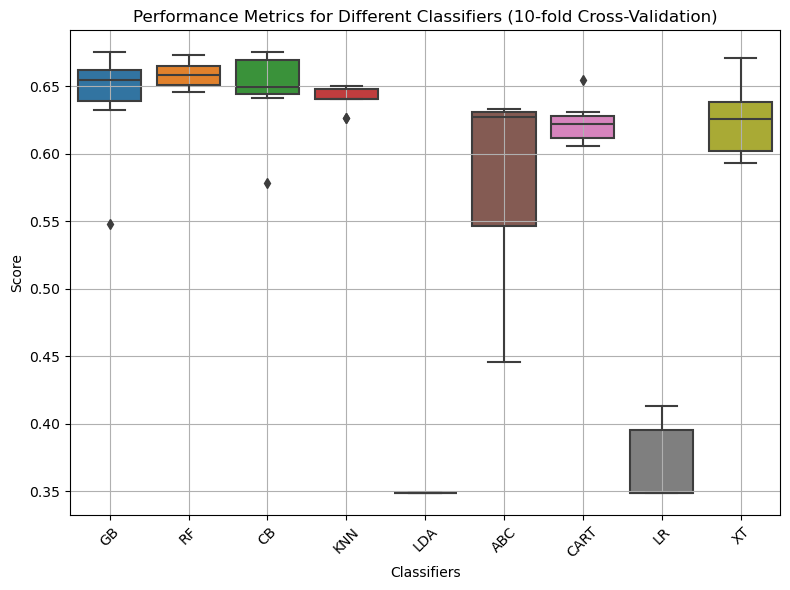

In [5]:
import os
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# dataset = pd.read_csv('/Users/samson/Documents/Final2/swell/swell_all.csv')
dataset = pd.read_csv('/Users/samson/Documents/Final3/swell2/merged_hrv_stress_labels.csv')

#swell
# label_mapping = {"no stress": 0, "time pressure": 1, "interruption": 1}
# dataset['condition'] = dataset['condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['HR', 'SCR']

y = dataset['Condition'].copy()
X = dataset[subCol]

# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final3/swell2/results'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier and find the best one
best_score = 0
best_clf_name = None
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")

    # Extract the cross-validation results
    cv_results = result['cv_results']

    # Number of folds - this assumes that each 'split{i}_test_score' is present in the results
    n_folds = len([key for key in cv_results.keys() if key.startswith('split') and key.endswith('test_score')])

    # Print the accuracy and F1 score for each fold
    for fold_idx in range(n_folds):
        fold_accuracy_key = f'split{fold_idx}_test_score'
        fold_accuracy = cv_results[fold_accuracy_key].mean()

        fold_f1_key = f'split{fold_idx}_test_f1_score'  # Assuming F1 scores are stored with this pattern
        fold_f1_score = result['test_f1_score'] if 'test_f1_score' in result else None  # Extract F1 score if available

        print(f"Fold {fold_idx + 1}: Mean accuracy: {fold_accuracy:.4f}, Mean F1 score: {fold_f1_score:.4f}")

    # Calculate and print the overall mean accuracy across all folds
    mean_accuracy = sum(cv_results[f'split{i}_test_score'].mean() for i in range(n_folds)) / n_folds
    print(f"Overall Mean Accuracy: {mean_accuracy:.4f}")

    # If F1 scores were calculated and stored, calculate and print the overall mean F1 score
    if 'test_f1_score' in result:
        # If F1 scores were stored per fold, you would calculate the mean F1 across folds here
        # As an example, it uses the F1 score from the best model (test set)
        mean_f1_score = result['test_f1_score']
        print(f"Overall Mean F1 Score: {mean_f1_score:.4f}")

    print("\n")

# Visualization code remains the same
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_dict(test_scores, orient='index').transpose()

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Performance Metrics for Different Classifiers (10-fold Cross-Validation)')
plt.ylabel('Score')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

Accuracy: 0.51497
Best Classifier: RF
Best Mean Test Score: 0.944441104917676
Accuracy of Best Classifier: 0.51497
F1 Score of Best Classifier: 0.35411
[1 1 1 ... 1 1 1]
Hyperparameters of the Best Classifier (RF):
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


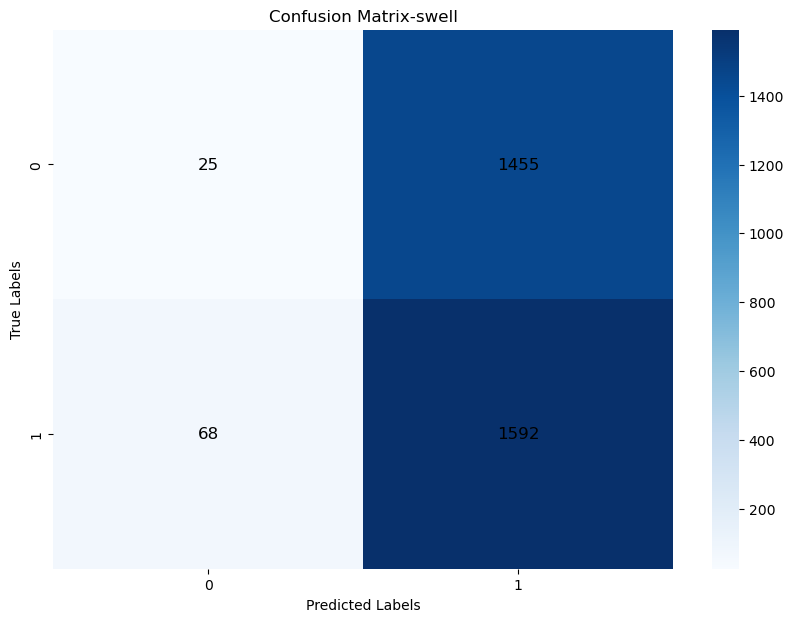

In [1]:
import os
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

dataset = pd.read_csv('/Users/samson/Documents/Final3/swell2/merged_hrv_stress_labels.csv')
dataset.fillna(0, inplace=True)

label_mapping = {"R": 0, "N": 0, "T": 1, "I": 1}
dataset['Condition'] = dataset['Condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['HR', 'SCR']

y = dataset['Condition'].copy()
X = dataset[subCol]

# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final3/video2/results'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier and find the best one
best_score = 0
best_clf_name = None
for clf_name, result in results.items():
    # Calculate the average test score for the current classifier
    mean_test_score = result['cv_results']['mean_test_score'].mean()
    if mean_test_score > best_score:
        best_score = mean_test_score
        best_clf_name = clf_name

# Load the best estimator model for the best classifier
best_estimator = results[best_clf_name]['best_estimator']

# # Assuming it's a classifier, class probabilities for each sample
# class_probabilities = best_estimator.predict_proba(X)
# print (class_probabilities)

# # Assuming it's a classifier, class probabilities for each sample
# class_probabilities = best_estimator.predict_proba(X)
# print (class_probabilities)

# Make predictions using the best model on your data
predictions = best_estimator.predict(X)

# Calculate accuracy using 'y' as the true labels
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.5f}")

# # Ensure y_test is of the same type as predictions
y = y.astype(predictions.dtype)

# Calculate the F1 score for the best classifier
f1 = f1_score(y, predictions, average='macro')  # Use 'macro' for multi-class classification, adjust as needed

print(f"Best Classifier: {best_clf_name}")
print(f"Best Mean Test Score: {best_score}")
print(f"Accuracy of Best Classifier: {accuracy:.5f}")
print(f"F1 Score of Best Classifier: {f1:.5f}")

print(predictions)

# Print the hyperparameters of the best classifier
print(f"Hyperparameters of the Best Classifier ({best_clf_name}):")
print(best_estimator.get_params())

# Print each prediction value on a separate line for all 
# for i, pred in enumerate(predictions):
#     print(f"Sample {i}: Prediction - {pred}")

# Making the Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues')  # Turn off automatic annotation

# Manually add text annotations with better control.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], 
                fontsize=12,  # you can change this size to fit your needs
                ha='center', va='center')

plt.title('Confusion Matrix-swell')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()